<a href="https://colab.research.google.com/github/EslamKampoza/Deep-Learning-Crash-Course-on-Youtube-/blob/main/builtin_smote12-12-2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import time
from matplotlib import pyplot
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
#Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD

In [2]:
##Ploting Confusion Matrix
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()

In [3]:
train = pd.read_csv('WISDM.csv',header=None)
train = train[(train != '?').all(axis=1)]
#test = pd.read_csv('test.csv')
labels1 = train[train.columns[len(train.columns)-1]]
Data1 = train[train.columns[:-1]]
peek=train.head()
print(peek)
print(train.shape)


   0     1     2     3     4     5     6     7     8     9   ...      35  \
0  33  0.04  0.09  0.14  0.12  0.11  0.10  0.08  0.13  0.13  ...  293.94   
1  33  0.12  0.12  0.06  0.07  0.11  0.10  0.11  0.09  0.12  ...  269.44   
2  33  0.14  0.09  0.11  0.09  0.09  0.11  0.12  0.08  0.05  ...  248.65   
3  33  0.06  0.10  0.09  0.09  0.11  0.07  0.12  0.10  0.14  ...  709.09   
4  33  0.12  0.11  0.10  0.08  0.10  0.14  0.10  0.11  0.08  ...    3300   

        36    37    38    39    40    41    42     43       44  
0     1550  3.29  7.21  4.00  4.05  8.17  4.05  11.96  Jogging  
1  1233.33  4.23  6.88  4.05  5.43  8.19  5.43  12.05  Jogging  
2     1780  4.18  6.89  4.07  5.55  8.19  5.55  11.99  Jogging  
3     1380  2.26  4.13  2.49  2.87  4.95  2.87  10.69  Walking  
4     1775  2.29  3.94  2.41  3.08  4.64  3.08  10.80  Walking  

[5 rows x 45 columns]
(4944, 45)


In [4]:
unique,counts = np.unique(labels1,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 507,
 'Jogging': 1612,
 'Sitting': 134,
 'Standing': 75,
 'Upstairs': 587,
 'Walking': 2029}

In [5]:
from sklearn.model_selection import train_test_split
trainData, testData, trainLabel, testLabel = train_test_split(Data1, labels1, test_size=0.20, random_state=42)

In [7]:
sm = SMOTE(random_state = 2)
Data_res,labels_res = sm.fit_resample(trainData,trainLabel)

In [8]:
unique,counts = np.unique(labels_res,return_counts = True)
dict(zip(unique,counts))

{'Downstairs': 1625,
 'Jogging': 1625,
 'Sitting': 1625,
 'Standing': 1625,
 'Upstairs': 1625,
 'Walking': 1625}

In [9]:
trainData = Data_res
trainLabel = labels_res

In [10]:
#encoding Labels

encoder = LabelEncoder()

#encoding test labels

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

#encoding train labels

encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [11]:
scaler = MinMaxScaler()
scaler.fit(trainData)
Scaled_trainData = scaler.transform(trainData)
Scaled_testData = scaler.transform(testData)

In [13]:
unique,counts = np.unique(testLabelE,return_counts = True)
dict(zip(unique,counts))

{0: 106, 1: 336, 2: 21, 3: 18, 4: 104, 5: 404}

K-Nearest Neighbors Accuracy: 0.40546
Confusion matrix, without normalization
[[ 29   8   3   5  31  30]
 [ 44 189   2  19  48  34]
 [  1   0  12   7   1   0]
 [  0   6   6   5   1   0]
 [ 28   9   3   7  29  28]
 [119  40   1   8  99 137]]


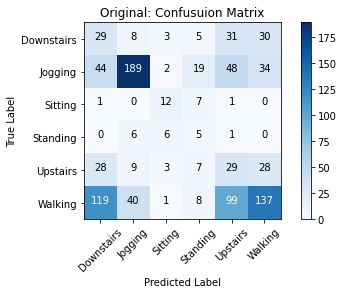

              precision    recall  f1-score   support

           0       0.13      0.27      0.18       106
           1       0.75      0.56      0.64       336
           2       0.44      0.57      0.50        21
           3       0.10      0.28      0.14        18
           4       0.14      0.28      0.19       104
           5       0.60      0.34      0.43       404

    accuracy                           0.41       989
   macro avg       0.36      0.38      0.35       989
weighted avg       0.54      0.41      0.45       989



In [12]:
clf2= KNeighborsClassifier(n_neighbors=12)
knnModel2 = clf2.fit(trainData,trainLabelE)
y_te_pred2 = clf2.predict(testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))

K-Nearest Neighbors Accuracy: 0.76542
Confusion matrix, without normalization
[[ 77   1   0   1  21   6]
 [  5 325   0   0   3   3]
 [  0   0  21   0   0   0]
 [  2   0   0  16   0   0]
 [ 43   1   0   0  53   7]
 [ 98   0   0   0  41 265]]


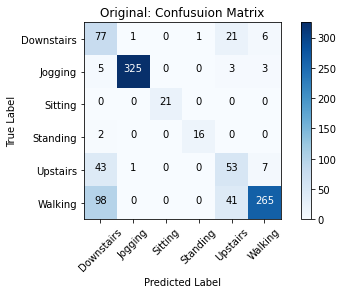

              precision    recall  f1-score   support

           0       0.34      0.73      0.47       106
           1       0.99      0.97      0.98       336
           2       1.00      1.00      1.00        21
           3       0.94      0.89      0.91        18
           4       0.45      0.51      0.48       104
           5       0.94      0.66      0.77       404

    accuracy                           0.77       989
   macro avg       0.78      0.79      0.77       989
weighted avg       0.85      0.77      0.79       989



In [14]:
clf2= KNeighborsClassifier(n_neighbors=12)
knnModel2 = clf2.fit(Scaled_trainData,trainLabelE)
y_te_pred2 = clf2.predict(Scaled_testData)

acc2 = accuracy_score(testLabelE,y_te_pred2)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc2)) #.907
cfs=confusion_matrix(testLabelE,y_te_pred2)
pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="Original: Confusuion Matrix")
print(classification_report(testLabelE,y_te_pred2))